# Information Retrieval Exercise 1 Notebook

 - Due Date: Wed 26th February, 4.30pm
 - This is an *Individual Exercise*
 - Anticipated Hours: ~10 hours (assuming you have already completed Lab 1
 - Submit through Moodle Quiz

# Introduction

In this exercise, building on the previous Lab 1 exercise and the tutorial on PyTerrier, you will be further familiarising yourself with PyTerrier by deploying various retrieval approaches and evaluating their impact on retrieval performance, as well as learning how to conduct an experiment in IR, and how to analyse results.


We have provided a medium size Web dataset (a user agreement to access and use this dataset is required), on which you will conduct your experiments. It is a sample of a TREC Web test collection, of approx. 800k documents, with corresponding topics (i.e. queries) & relevance assessments (i.e. qrels). If you have signed the required user agreement (see Moodle), you would have been emailed a personal login/password to access an index for this collection via PyTerrier's get_dataset() function, using the dataset name “50pct” and your personal credentials.  DO NOT SHARE YOUR CREDENTIALS.

This is an *individual exercise*. Your work will be submitted through the Exercise 1 Quiz Instance available on Moodle. The Quiz asks you various questions, which you should answer based on the experiments you have conducted. To support you conducting your work, you are strongly encouraged to make the best use of the two dedicated lab sessions to this exercise.

To help you structure your experiments, the rest of this notebook describes the experiments you need to conduct in relation to four tasks. Once you conduct a task, you should answer the corresponding questions on the Exercise 1 Quiz instance. **Ensure that you click the “Next Page” button to incrementally save your answers on the Quiz instance.**

## Assumed Knowledge

This Exercise assumes knowedge of Pandas and PyTerrier from Lab 1, which you should have completed by now (also see PyTerrier Tutorial). The relevant parts of the PyTerrier documentation are:
 - [Using Terrier indices in PyTerrier](https://pyterrier.readthedocs.io/en/latest/terrier-indexing.html)
 - [Terrier Retrieval using PyTerrier](https://pyterrier.readthedocs.io/en/latest/terrier-retrieval.html), e.g. pt.terrier.Retriever
 - [Operators on PyTerrier transformers](https://pyterrier.readthedocs.io/en/latest/operators.html)




# Setup

NB: Windows users may need to use `%pip install  --user python-terrier gensim` -- you can ignore warnings about cython, PATH etc. If in doubt, resort to Colab

In [1]:
%pip install -q python-terrier gensim

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.4/163.4 kB 809.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.9/347.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.7 MB/s eta 0:00:00


In [2]:
import pyterrier as pt

import pandas as pd
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_rows', 200)

# Datasets for Ex1

For Exercise 1, we'll be using the Datasets API to obtain the files we need for this exercise. PyTerrier actually provides many datasets. You can list all of them using `pt.list_datasets()`.

In [3]:
pt.list_datasets().head()

,dataset,topics,topics_lang,qrels,corpus,corpus_lang,index,info_url
0,50pct,"[training, validation]",en,"[training, validation]",None,None,"[ex2, ex3]",None
1,antique,"[train, test]",en,"[train, test]",True,en,None,https://ciir.cs.umass.edu/downloads/Antique/readme.txt
2,vaswani,True,en,True,True,en,True,http://ir.dcs.gla.ac.uk/resources/test_collections/npl/
3,msmarco_document,"[train, dev, test, test-2020, leaderboard-2020]",en,"[train, dev, test, test-2020]",True,en,True,https://microsoft.github.io/msmarco/
4,msmarcov2_document,"[train, dev1, dev2, valid1, valid2, trec_2021]",en,"[train, dev1, dev2, valid1, valid2]",None,None,True,https://microsoft.github.io/msmarco/TREC-Deep-Learning.html


There are several sets of files we need for Exercise 1:
 - We need an index for 50% of the TREC GOV corpus. We provide this through the "50pct" dataset, but you will need the username and password that you have been assigned once you accepted the user license agreement.
 - the topics (queries) and qrels (relevance assessments) for evaluating the performance of our search engine. These come from the "trec-wt-2004" dataset.

Update your username and password. DO NOT SHARE your login details with other students - all they need to do is to agree to the user agreement on Moodle.



In [4]:
USERNAME = "3048044h"
PASSWORD = "b5149a64"

dotgov_50pct = pt.get_dataset("50pct", user=USERNAME, password=PASSWORD)
dotgov_topicsqrels = pt.get_dataset("trec-wt-2004")

The size of the "50pct" index is 800MB - this will take a minute or so for Colab to download before we load it for the first time. You can read on while its downloading.

In [5]:
indexref = dotgov_50pct.get_index('ex2')
index = pt.IndexFactory.of(indexref)


data.meta-0.fsomapfile:   0%|          | 0.00/50.1M [00:00<?, ?iB/s]

data.direct.bf:   0%|          | 0.00/263M [00:00<?, ?iB/s]

data.document.fsarrayfile:   0%|          | 0.00/13.1M [00:00<?, ?iB/s]

data.inverted.bf:   0%|          | 0.00/273M [00:00<?, ?iB/s]

data.lexicon.fsomapfile:   0%|          | 0.00/168M [00:00<?, ?iB/s]

data.lexicon.fsomaphash:   0%|          | 0.00/0.99k [00:00<?, ?iB/s]

data.lexicon.fsomapid:   0%|          | 0.00/7.80M [00:00<?, ?iB/s]

data.meta.idx:   0%|          | 0.00/6.16M [00:00<?, ?iB/s]

data.meta.zdata:   0%|          | 0.00/19.2M [00:00<?, ?iB/s]

data.properties:   0%|          | 0.00/4.13k [00:00<?, ?iB/s]

terrier-assemblies 5.11 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


Java started (triggered by IndexFactory.of) and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]


# Q1 [2 marks]

Using this setup, you now have sufficient knowledge from the Lab 1 to complete this task, namely to get the indexing statistics of the "50pct" collection.

Print the index collection statistics and answer the corresponding Quiz questions by entering the obtained indexing statistics: number of documents, number of terms, number of tokens, number of postings.


In [6]:
#YOUR SOLUTION
stats = index.getCollectionStatistics()
num_of_doc = stats.getNumberOfDocuments()
num_of_tokens = stats.getNumberOfTokens()
num_of_postings = stats.getNumberOfPostings()
num_of_terms = stats.getNumberOfUniqueTerms()
#solution quiz 1-4
print("number of documents: ", num_of_doc)
print("number of tokens: ", num_of_tokens)
print("number of posting: ", num_of_postings)
print("number of terms: ", num_of_terms)

number of documents:  807775
number of tokens:  572916194
number of posting:  177737957
number of terms:  2043788


# Retrieval & Evaluation

In our experiments, we are using three sets of topics: homepage finding ("hp"), named page finding ("np") and topic distillation ("td"). They correspond to different user information needs on the Web:

- Homepage finding: The user's aim is to find the homepage of a given entity (person, organisation, etc) - e.g.  ‘University of Glasgow’, and the system should return the URL of that site’s homepage at (or near) rank one.

- Named page finding: The user aims to find a particular webpage/document - e.g. 'Uk Tax return form’, and the system should return the URL of that page at (or near) rank one.

- Topic distillation: The user aims to find as many relevant webpages as possible about a general topic. - e.g. ‘electoral  college’,  the  system  should  return and rank highly as many relevant webpages about the topic as possible. Each topic might have many relevant documents (similar to an adhoc search task).


For instance, to load the topics for "hp", you can do the following:

In [7]:
topics = dotgov_topicsqrels.get_topics(variant="hp")
topics.head(5)

Web2004.query.stream.trecformat.txt:   0%|          | 0.00/15.3k [00:00<?, ?iB/s]

04.topic-map.official.txt:   0%|          | 0.00/2.53k [00:00<?, ?iB/s]

,qid,query
0,6,philadelphia streets
1,7,togo embassy
2,9,baltimore
3,17,secure linux
4,29,grand canyon monitoring and research center



Let's create a simple TF_IDF retriever - we will use this for demonstrating IR evaluation using PyTerrier.

In [8]:
retr = pt.terrier.Retriever(index, wmodel="TF_IDF")

Let's see how we can actually evaluate our TF_IDF retrieval system. Firstly, we'll need the qrels.

In [9]:
qrels = dotgov_topicsqrels.get_qrels(variant='hp')

04.qrels.web.mixed.txt:   0%|          | 0.00/1.90M [00:00<?, ?iB/s]

We can use `pt.Evaluate(results, qrels, metrics)` to evaluate the results. The metrics argument (with default value `["map", ndcg"]`) allows to configure the evaluation measures. For example, we can obtain the Mean Average Precision for a set of results `res` using relevance assessments `qrels` as follows:

In [10]:
res = retr.transform(topics)
eval = pt.Evaluate(res, qrels, metrics=["map"])
eval

{'map': 0.20894845478512017}

However, creating the `res` dataframe for each system in turn, and then evaluating it, is laborious and imperative in nature. We strongly recommend using [`pt.Experiment()`](https://pyterrier.readthedocs.io/en/latest/experiments.html) to evaluate one or more retrieval systems at once, in a declarative manner (see PyTerrier Tutorial).

Take the time to read the [documentation for `pt.Experiment()`](https://pyterrier.readthedocs.io/en/latest/experiments.html) to understand its available functionality. Tasks Q2-Q4 will all require that you adapt the arguments to `pt.Experiment()` and use its output in different ways (e.g. for significance testing).

In [11]:
pt.Experiment(
    [retr],
     dotgov_topicsqrels.get_topics(variant='hp'),
     dotgov_topicsqrels.get_qrels(variant='hp'),
     eval_metrics=['map'],
    round = 4
)

,name,map
0,TerrierRetr(TF_IDF),0.2089


# Q2

Now you will experiment with three weighting models (TF_IDF, BM25 and PL2) and analyse their results on 3 different topic sets, representing different Web retrieval tasks: homepage finding (variant “hp”), named page finding (“np”), and topic distillation (“td”). These three topic sets and the corresponding qrels can also be accessed through PyTerrier's `get_dataset()` function, e.g.:

```python
topicsHP = pt.get_dataset(“trec-wt-2004”).get_topics(”hp”)
qrelsHP = pt.get_dataset(“trec-wt-2004”).get_qrels(”hp”)
```

In particular, we would like to compare the performances of the more advanced BM25 and PL2 term weighting models to those of TF_IDF, which is our baseline here. In other words, do the BM25 and PL2 models significantly improve the performances of the TF_IDF baseline on the three used topic sets?


# Q2(a)    [12 marks]

Provide the required MAP performances of each of the weighting models over the 3 topic sets. In particular, for each topic set (hp, np, td), compare the MAP performances of BM25 and PL2 to that of TF_IDF used as a *baseline* and answer if there are any observed statistical significance differences (p-value < 0.05) between the 3 models, when prompted by the Quiz. Next, provide the average MAP performance of each weighting model across the three topic sets (i.e. a global average performance over the three topic sets), when prompted by the Quiz instance. **Report your MAP performances rounded to 4 decimal places.**


*Hint*: We encourage you to write your own functions that perform reusable operations across different topic sets.

In [42]:
#YOUR SOLUTION
trec_wt_dataset = pt.get_dataset("trec-wt-2004")

topics_hp = trec_wt_dataset.get_topics("hp")
topics_np = trec_wt_dataset.get_topics("np")
topics_td = trec_wt_dataset.get_topics("td")

qrels_hp = trec_wt_dataset.get_qrels("hp")
qrels_np = trec_wt_dataset.get_qrels("np")
qrels_td = trec_wt_dataset.get_qrels("td")

bm25 = pt.BatchRetrieve(index, wmodel="BM25")
pl2 = pt.BatchRetrieve(index, wmodel="PL2")
tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")

variants = ["hp", "np", "td"]
map_results=[]

for variant in variants:
  res = pt.Experiment(
        [tfidf, bm25, pl2],
        topics,
        qrels,
        eval_metrics=["map"],
        names=["TF_IDF", "BM25", "PL2"],
        round=5,
        baseline=0  # TF_IDF as baseline
    )
  map_results.append(res)

print(map_results)
hp_results = pt.Experiment(
    [tfidf, bm25, pl2],
    topics_hp,
    qrels_hp,
    eval_metrics=['map'],
    names=["TF-IDF", "BM25", "PL2"],
    round = 5
)

np_results = pt.Experiment(
    [tfidf, bm25, pl2],
    topics_np,
    qrels_np,
    eval_metrics=['map'],
    names=["TF-IDF", "BM25", "PL2"],
    round = 5
)

td_results = pt.Experiment(
    [tfidf, bm25, pl2],
    topics_td,
    qrels_td,
    eval_metrics=['map'],
    names=["TF-IDF", "BM25", "PL2"],
    round = 5
)

#solution quiz 5-16
map_tfidf_hp, map_bm25_hp, map_pl2_hp = hp_results["map"]
map_tfidf_np, map_bm25_np, map_pl2_np = np_results["map"]
map_tfidf_td, map_bm25_td, map_pl2_td = td_results["map"]

# Print results rounded to 4 decimal places
print(f"MAP Scores (HP):  TF-IDF = {round(map_tfidf_hp,4)}, BM25 = {round(map_bm25_hp,4)}, PL2 = {round(map_pl2_hp,4)}")
print(f"MAP Scores (NP):  TF-IDF = {round(map_tfidf_np,4)}, BM25 = {round(map_bm25_np,4)}, PL2 = {round(map_pl2_np,4)}")
print(f"MAP Scores (TD):  TF-IDF = {round(map_tfidf_td,4)}, BM25 = {round(map_bm25_td,4)}, PL2 = {round(map_pl2_td,4)}")

average_map_hp = (map_tfidf_hp+map_tfidf_np+map_tfidf_td)/3
average_map_bm25 = (map_bm25_hp+map_bm25_np+map_bm25_td)/3
average_map_pl2 = (map_pl2_hp+map_pl2_np+map_pl2_td)/3

#solution quiz 17-19
print(f"Average MAP :  TF-IDF = {round(average_map_hp,4)}, BM25 = {round(average_map_bm25,4)}, PL2 = {round(average_map_pl2,4)}")

<ipython-input-42-57c7cf187a36>:12: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  bm25 = pt.BatchRetrieve(index, wmodel="BM25")
<ipython-input-42-57c7cf187a36>:13: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  pl2 = pt.BatchRetrieve(index, wmodel="PL2")
<ipython-input-42-57c7cf187a36>:14: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")


[     name      map  map +  map -  map p-value
0  TF_IDF  0.06979    NaN    NaN          NaN
1    BM25  0.07025   26.0   31.0     0.249291
2     PL2  0.06953   39.0   36.0     0.862098,      name      map  map +  map -  map p-value
0  TF_IDF  0.06979    NaN    NaN          NaN
1    BM25  0.07025   26.0   31.0     0.249291
2     PL2  0.06953   39.0   36.0     0.862098,      name      map  map +  map -  map p-value
0  TF_IDF  0.06979    NaN    NaN          NaN
1    BM25  0.07025   26.0   31.0     0.249291
2     PL2  0.06953   39.0   36.0     0.862098]
MAP Scores (HP):  TF-IDF = 0.2089, BM25 = 0.2186, PL2 = 0.2251
MAP Scores (NP):  TF-IDF = 0.4477, BM25 = 0.4416, PL2 = 0.4392
MAP Scores (TD):  TF-IDF = 0.0698, BM25 = 0.0703, PL2 = 0.0695
Average MAP :  TF-IDF = 0.2422, BM25 = 0.2435, PL2 = 0.2446


#Q2(b)  [10 marks]

Next, for each topic set (hp, np, td), draw a single recall-precision graph comparing the performances of the 3 used weighting models (TF_IDF, BM25, PL2). Upload the resulting graphs into the Moodle instance when prompted (**check the graphs are readable/complete**). Then, answer the corresponding questions on the Quiz instance.


Hints:
 - You will need to use the `"iprec_at_recall"` measure, which gives precision at a given standard recall value.
 - Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

hp variant TF_IDF Recall: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] Precision: [0.2131 0.2131 0.2131 0.2131 0.2131 0.2131 0.2065 0.2065 0.2065 0.2065
 0.2065]
hp variant BM25 Recall: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] Precision: [0.2228 0.2228 0.2228 0.2228 0.2228 0.2228 0.2161 0.2161 0.2161 0.2161
 0.2161]
hp variant PL2 Recall: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] Precision: [0.2292 0.2292 0.2292 0.2292 0.2292 0.2292 0.2225 0.2225 0.2225 0.2225
 0.2225]
np variant TF_IDF Recall: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] Precision: [0.4498 0.4498 0.4498 0.4498 0.4498 0.4498 0.4466 0.4466 0.4466 0.4466
 0.4466]
np variant BM25 Recall: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] Precision: [0.4437 0.4437 0.4437 0.4437 0.4437 0.4437 0.4403 0.4403 0.4403 0.4403
 0.4403]
np variant PL2 Recall: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] Precision: [0.4432 0.4432 0.4432 0.4432 0.4432 0.4432 0.4365 0.

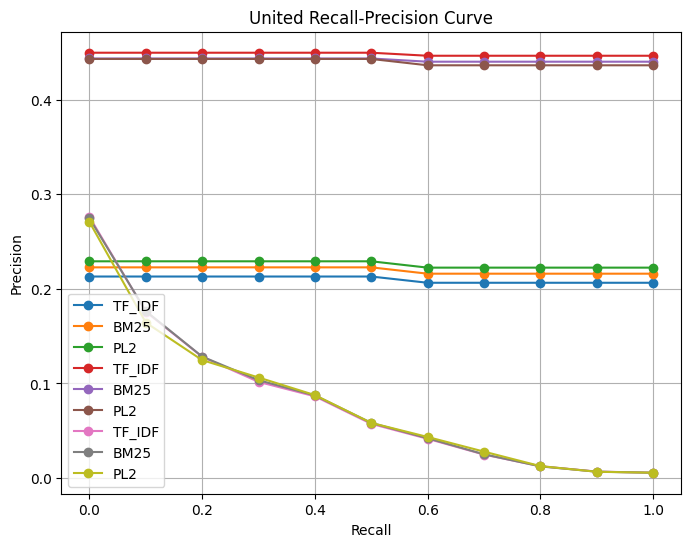

In [13]:
import matplotlib.pyplot as plt
recall_levels = [f"iprec_at_recall_{r/10:.1f}" for r in range(11)]
recall, precesion = [],[]
plt.figure(figsize=(8, 6))
for variant in variants:
    topics = dotgov_topicsqrels.get_topics(variant=variant)
    qrels = dotgov_topicsqrels.get_qrels(variant=variant)

    # Run experiment for recall-precision values
    res = pt.Experiment(
        [tfidf, bm25, pl2],
        topics,
        qrels,
        eval_metrics=recall_levels,  # Compute precision at recall levels
        names=["TF_IDF", "BM25", "PL2"],
        round = 4
    )
    # Plotting Recall-Precision Curve
    for model in ["TF_IDF", "BM25", "PL2"]:
        recall, precesion = [r/10 for r in range(11)], res[res["name"] == model][recall_levels].values.flatten()
        #solution quiz 23-31
        print(f"{variant} variant {model} Recall: {recall} Precision: {precesion}")
        plt.plot(recall, precesion, label=model, marker="o")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("United Recall-Precision Curve")
plt.legend()
plt.grid(True)
plt.savefig("recall_precision_United.png")
plt.show()

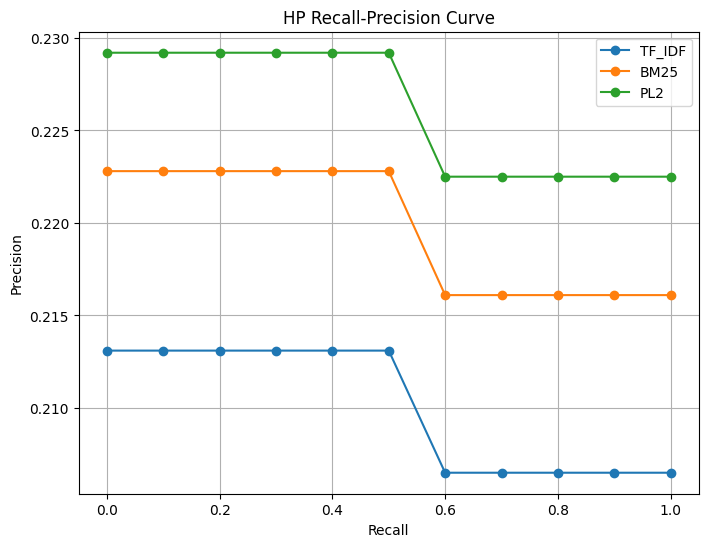

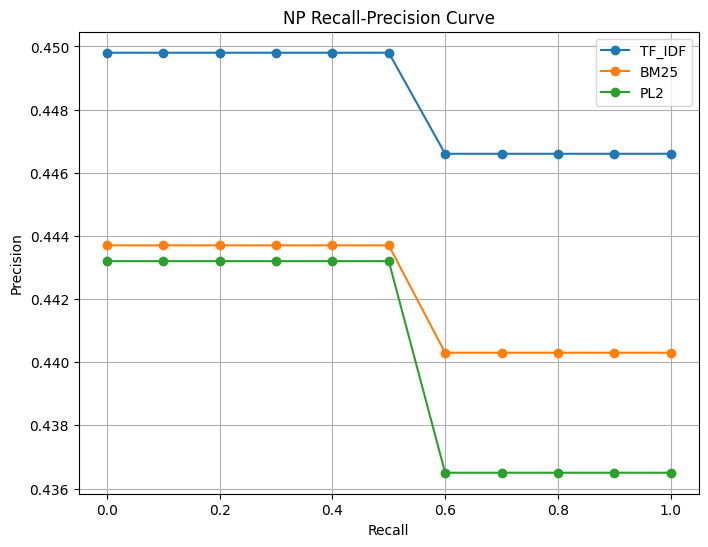

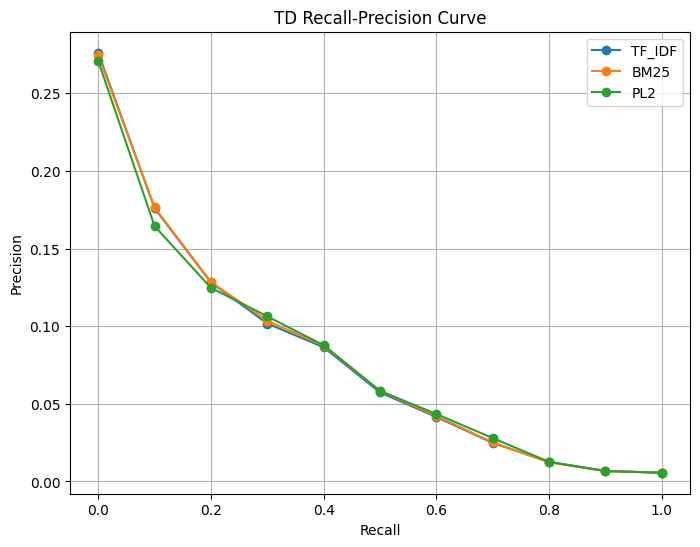

In [14]:
#solution quiz 20-22
for variant in variants:
    topics = dotgov_topicsqrels.get_topics(variant=variant)
    qrels = dotgov_topicsqrels.get_qrels(variant=variant)

    # Run experiment for recall-precision values
    res = pt.Experiment(
        [tfidf, bm25, pl2],
        topics,
        qrels,
        eval_metrics=recall_levels,  # Compute precision at recall levels
        names=["TF_IDF", "BM25", "PL2"],
        round = 4
    )

    # Plotting Recall-Precision Curve
    plt.figure(figsize=(8, 6))
    for model in ["TF_IDF", "BM25", "PL2"]:
        plt.plot([r/10 for r in range(11)], res[res["name"] == model][recall_levels].values.flatten(), label=model, marker="o")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{variant.upper()} Recall-Precision Curve")
    plt.legend()
    plt.grid(True)

    plt.savefig(f"recall_precision_{variant}.png")
plt.show()

#Q2 (c) [1 mark]

Finally, you should now answer on the Quiz the most effective weighting model (in terms of average Mean Average Precision), which you will use for the rest of Exercise 1. To find this model, simply identify the weighting model with the highest average performance over the 3 topic sets.  


In [15]:
#YOUR SOLUTION
all_map = pd.concat([df[["name", "map"]] for df in map_results], ignore_index=True)

# Compute average MAP per model
avg_map = all_map.groupby("name")["map"].mean().reset_index()
avg_map.columns = ["Model", "Average MAP"]
print("\nAverage MAP across all topic sets:\n", avg_map)

# Identify the best model
best_model = avg_map.loc[avg_map["Average MAP"].idxmax()]
#solution quiz 32
print("\nBest Model: ", best_model["Model"])


Average MAP across all topic sets:
     Model  Average MAP
0    BM25       0.2186
1     PL2       0.2251
2  TF_IDF       0.2089

Best Model:  PL2


# Q3 Query Expansion

Query expansion is one of the most well-known and effective techniques for improving the effectiveness of a search engine. We'll be using the Terrier's Bo1 query expansion model.

You will now conduct the Query Expansion experiments using the weighting model that produced the highest average Mean Average Precision (MAP) across the 3 topic sets in Q2.

See the [relevant documentation](https://pyterrier.readthedocs.io/en/latest/rewrite.html#bo1queryexpansion) about creating a QE transformer pipeline in PyTerrier using the Bo1 model.





#Q3(a).  [6 marks]

For each of the topic sets (i.e. homepage finding (hp), named page finding (np), and topic distillation (td)), run an experiment evaluating the application of query expansion on the best weighting model identified in Q2(c) used here as the *baseline*. Query expansion has a few parameters, e.g. query expansion model, number of documents to analyse, number of expansion terms – in conducting your experiments, you should simply use the default query expansion settings of Terrier: Bo1, 3 documents, 10 expansion terms. Report the obtained MAP performances in the Quiz instance then answer the corresponding questions. **Report your MAP performances rounded to 4 decimal places.**

Recall that the required experiments for evaluating the application of query expansion should be conducted with the best weighting model identified in the previous question Q2(c).

In [16]:
#YOUR SOLUTION
bo1 = pt.rewrite.Bo1QueryExpansion(index)
ret_model = pt.terrier.Retriever(index, wmodel=best_model["Model"])
pipeline = ret_model >> bo1 >> ret_model
print("MAP Performance")
print(f"Baseline     | After Query Expansion")
for variant in variants:
    topics = trec_wt_dataset.get_topics(variant=variant)
    qrels = trec_wt_dataset.get_qrels(variant=variant)
    res = pt.Experiment(
        [pipeline],
        topics,
        qrels,
        eval_metrics=["map"],
        names=[f"{best_model['Model']} + bo1"],
        round=4
    )
    baseline_results = pt.Experiment(
        [ret_model],
        topics,
        qrels,
        eval_metrics=["map"],
        names=[f"{best_model['Model']}"],
        round=4
    )
    #solution quiz 33,35,37
    print(f"{variant}: {baseline_results['map'][0]:}   |   {variant}: {res['map'][0]:}")

MAP Performance
Baseline     | After Query Expansion
hp: 0.2251   |   hp: 0.2423
np: 0.4392   |   np: 0.4442
td: 0.0695   |   td: 0.0671


#Q3(b)   [9 marks]

Now, you will delve into the performance of the best retrieval model identified in Question Q2(c) using the topic distillation (“td”) topic set. Draw a query-delta bar chart (see example in Lecture 5) comparing the Average Precision (AP) performance of your system with and without query expansion - each bar represents the difference in average precision for a given query between the baseline and after applying QE for that query (i.e. “delta_AP = QE_AP - noQE_AP”). As the topic set has 75 queries, your figure should only show the queries that have delta_AP > 0.02 absolute, in order to focus on queries that have the biggest positive or negative changes. Your x-axis should be labelled with the qid and the text of the original query and your queries should be ordered as could be seen in Lecture 5 (Slide 62). Using the produced bar chart (**check the graph is readable/complete**), and the corresponding data, you should now be able to answer the corresponding questions in the Quiz.

*Hints*:
 - You will need to use the `perquery=True` option for `pt.Experiment()`. You will also need to analyse the expanded queries.
 - You may need a [self-join](https://www.w3schools.com/sql/sql_join_self.asp) on a dataframe.
 - You can iterate through a dataframe using [`dataframe.iterrows()`](https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/)
 - You can examine the expanded queries by adjusting your pipeline, and executing the pipeline on the relevant topics.

MAP:
Baseline MAP (No QE)  : 0.0695
Bo1 QE MAP (With QE)  : 0.0671
Queries with |Delta AP| > 0.02:
qid  noQE_AP  QE_AP  delta_AP
  1   0.1923 0.1428   -0.0495
101   0.1396 0.1613    0.0217
133   0.0526 0.0802    0.0276
141   0.0671 0.0429   -0.0242
152   0.0533 0.0755    0.0222
164   0.2547 0.2821    0.0274
204   0.0981 0.0654   -0.0327
221   0.1754 0.1443   -0.0311
 47   0.0445 0.0711    0.0266
 58   0.0691 0.1023    0.0332
 74   0.3781 0.2905   -0.0876
 81   0.2543 0.2160   -0.0383
 87   0.3076 0.3363    0.0287
 97   0.2193 0.2571    0.0378


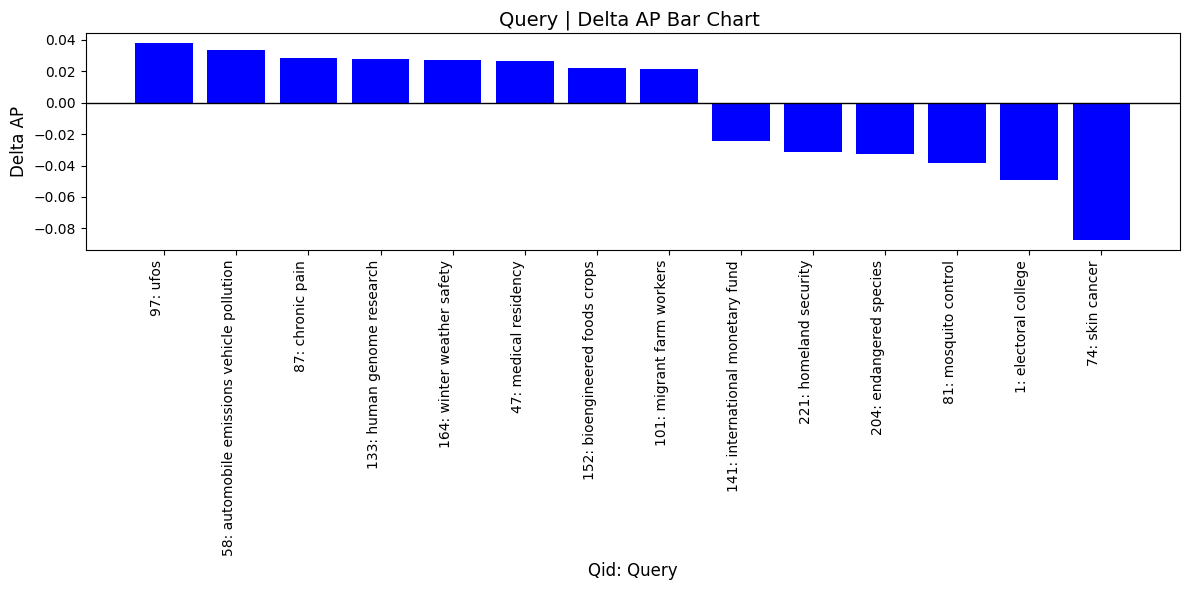

In [40]:
#YOUR SOLUTION
from pyterrier.measures import AP
import pandas as pd
ret_model_p2l = pt.terrier.Retriever(index, wmodel="PL2")
bo1_expansion = pt.rewrite.Bo1QueryExpansion(index)
qe_pipeline = ret_model_p2l >> bo1_expansion >> ret_model_p2l

baseline_res = {}
qe_res = {}

# Conduct baseline and QE experiments
for variant in variants:
    topics = trec_wt_dataset.get_topics(variant=variant)
    qrels = trec_wt_dataset.get_qrels(variant=variant)
    baseline_res[variant] = pt.Experiment(
        [ret_model],
        topics,
        qrels,
        eval_metrics=[AP],
        names=[f"{best_model['Model']}"],
        perquery=True,
        round=4
    )
    qe_res[variant] = pt.Experiment(
        [qe_pipeline],
        topics,
        qrels,
        eval_metrics=[AP],
        names=[f"{best_model['Model']} + bo1"],
        perquery=True,
        round=4
    )

baseline_df = pd.DataFrame(baseline_res["td"])[["qid", "value"]].rename(columns={"value": "noQE_AP"})
qe_df = pd.DataFrame(qe_res["td"])[["qid", "value"]].rename(columns={"value": "QE_AP"})

merged_df = pd.merge(baseline_df, qe_df, on="qid")
merged_df["delta_AP"] = merged_df["QE_AP"] - merged_df["noQE_AP"]

mean_ap_baseline = merged_df["noQE_AP"].mean()
mean_ap_qe = merged_df["QE_AP"].mean()

print("MAP:")
print(f"Baseline MAP (No QE)  : {mean_ap_baseline:.4f}")
print(f"Bo1 QE MAP (With QE)  : {mean_ap_qe:.4f}")

significant_changes = merged_df[merged_df["delta_AP"].abs() > 0.02]
print("Queries with |Delta AP| > 0.02:")
print(significant_changes[["qid", "noQE_AP", "QE_AP", "delta_AP"]].to_string(index=False))

queries_df = pd.DataFrame(topics)[["qid", "query"]]
sig_changes_with_text = pd.merge(significant_changes, queries_df, on="qid")

sig_changes_with_text = sig_changes_with_text.sort_values(by="delta_AP", ascending=False)

sig_changes_with_text["label"] = sig_changes_with_text["qid"].astype(str) + ": " + sig_changes_with_text["query"]

plt.figure(figsize=(12, 6))
plt.bar(sig_changes_with_text["label"], sig_changes_with_text["delta_AP"], color='b')
plt.xlabel("Qid: Query", fontsize=12)
plt.ylabel("Delta AP", fontsize=12)
plt.title("Query | Delta AP Bar Chart ", fontsize=14)
plt.xticks(rotation=90, ha="right")
plt.axhline(y=0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

In [41]:
# Solution quiz 40
neg_affected_queries = merged_df[merged_df["delta_AP"] < -0.02]
num_neg_affected = len(neg_affected_queries)
print("Number of queries negatively affected (>2% absolute drop in AP):", num_neg_affected)

#Solution quiz 41
pos_affected_queries = merged_df[merged_df["delta_AP"] > 0.02]
num_pos_affected = len(pos_affected_queries)
print("Number of queries negatively affected (>2% absolute drop in AP):", num_pos_affected)

#solution quiz 42
third_query = sig_changes_with_text.iloc[2]
qid_text = f"{third_query['qid']} {third_query['query'].lower()}"
print(qid_text)

#solution quiz 43
tenth_query = sig_changes_with_text.iloc[9]
qid_text = f"{tenth_query['qid']} {tenth_query['query'].lower()}"
print(qid_text)

#solution quiz 44
most_positive_query = sig_changes_with_text.iloc[0]
qid_text = f"{most_positive_query['qid']} {most_positive_query['query'].lower()}"
print(qid_text)

#solution quiz 45
print(qe_pipeline.search("ufos"))

#solution quiz 46
most_neg_query = sig_changes_with_text.iloc[-1]
qid_text = f"{most_neg_query['qid']} {most_neg_query['query'].lower()}"
print(qid_text)

#solution quiz 47
print(qe_pipeline.search("skin cancer"))

Number of queries negatively affected (>2% absolute drop in AP): 6
Number of queries negatively affected (>2% absolute drop in AP): 8
87 chronic pain
221 homeland security
97 ufos
    qid   docid           docno  rank      score query_0  \
0     1  758264  G28-15-3278046     0  18.703945    ufos   
1     1  564462  G20-26-0293153     1  17.922373    ufos   
2     1  119784  G03-94-2949102     2  16.446323    ufos   
3     1  663337  G24-21-1281217     3  15.200681    ufos   
4     1  665760  G24-30-3565331     4  14.800970    ufos   
..   ..     ...             ...   ...        ...     ...   
995   1   69892  G02-15-1422194   995   0.802895    ufos   
996   1  707768  G26-09-1458645   996   0.802518    ufos   
997   1  764260  G28-38-4077914   997   0.802418    ufos   
998   1  372687  G13-23-4012791   998   0.802355    ufos   
999   1  774481  G28-78-3145486   999   0.802330    ufos   

                                                                                                   

# Q4 Word Embeddings [10 marks]

Next, implement a new query expansion method as a PyTerrier transformer that uses a Word2Vec model for identifying semantically related terms. In particular, your implementation should take each query term in an incoming query, identify the most semantically related words - using a provided Word2Vec model and the Gensim Python library - to add to the query. In conducting this experiment, you need to choose:

-  How many similar terms to identify for each existing query term so as to ensure a *fair comparison* with the experiments conducted in Q3;

-  The relative importance of these new terms compared to the existing query terms;

-  How/if to integrate the Word2Vec cosine distance into your weighting formula.

-  An adequate pipeline to use your custom Word2Vec QE transformer.  

Compare the performance of your model in comparison to the **PL2 baseline** on the *topic distillation (“td”)* topic set. How many queries are improved or are degraded? Check how your new query expansion mechanism compares to Terrier’s standard Bo1 query expansion mechanism.


## Background on word2vec

Q4 asks for a word2vec-based query expansion model. Word2vec (also called word embeddings) is a shallow neural network where semantically similar words end up with similar embedding vectors.

If you haven't taken Text-as-Data, you can do some background reading about word embeddings at:
 - https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
 - https://en.wikipedia.org/wiki/Word2vec
 - https://en.wikipedia.org/wiki/Word_embedding

In general, while word2vec is still a very widely used model, note that it has been surpassed by more complex models such as BERT. But word2vec is still useful to consider in the context of query expansion.


# Setup of Gensim

In this part of the exercise, we will use [Gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html), a Python toolkit for working with a word2vec model.

We are providing a pre-trained word2vec model that Gensim will download and open - the file is quite large, so this might take a few minutes to download and a couple of minutes to load. You can read on while it opens.

In [27]:
import gensim.downloader as api
%time model = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded
CPU times: user 1min 52s, sys: 11 s, total: 2min 3s
Wall time: 2min 26s


# Example Usage of Gensim

`model` is of type [gensim.models.keyedvectors.KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors).

You can think of this as a dictionary mapping string words to the vector embeddings for each word.  For example, we can get the vector for the word `'government'` as follows:

In [28]:
emb = model.get_vector("government")
print(emb.shape)
print(emb)

(300,)
[ 2.5470e-02 -1.0216e-01 -2.8455e-01  2.8603e-01  1.9018e-01 -4.7529e-01
  1.4468e-01  1.9805e-01 -4.2931e-02 -2.9325e+00 -6.3137e-01  9.7630e-02
  1.0803e-01  5.4072e-01 -1.1834e-02  6.8399e-01  3.7241e-02 -3.8651e-01
  5.1331e-01 -4.0682e-01  3.3802e-01  3.9780e-02  1.0934e+00 -2.6993e-02
 -3.2652e-01  1.8426e-01  2.5084e-02 -1.9201e-02 -1.9761e-01  4.9951e-01
 -2.3426e-01 -1.1926e-01  4.3991e-02  3.2443e-01 -2.6306e-01 -1.7991e-01
  2.3484e-01  3.4124e-01 -3.1304e-01 -1.9777e-01 -1.9651e-01  2.8835e-01
 -1.6815e-01  3.8187e-01 -1.6562e-01 -4.0849e-01 -3.9998e-01  2.6185e-01
 -5.3972e-01  2.4353e-01  1.3366e-01 -3.0213e-01  3.7712e-01  1.8414e-01
  7.4082e-03  1.4511e-01  3.2574e-01  1.6853e-01 -1.0872e-01  1.9417e-02
 -3.2784e-01  3.9864e-01 -7.8588e-01  2.3249e-01  2.8092e-02 -4.3737e-01
  1.3954e-01 -4.0254e-01 -3.2712e-01  4.1180e-01  1.3976e-01  6.8819e-01
  3.9624e-02  2.7002e-02  2.3729e-01 -6.6964e-02  5.5686e-02  2.4415e-01
  1.2575e-03  5.1176e-01  1.3287e-01 -3.3563

As you can see, each word is represented by a 300-dimension vector.

We can also ask `model` for the most similar words to `'government'` using [`model.most_similar()`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar). It returns the 10 most similar words, based on the cosine similarity of their emebddings to that of `'government'`.

See also: [Example in Gensim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#what-can-i-do-with-word-vectors).

In [29]:
model.most_similar("government")

[('governments', 0.6940837502479553),
 ('administration', 0.654479444026947),
 ('authorities', 0.6283242702484131),
 ('officials', 0.626289427280426),
 ('federal', 0.6101000905036926),
 ('opposition', 0.6081914305686951),
 ('official', 0.5788125991821289),
 ('saying', 0.5778090953826904),
 ('public', 0.5756096243858337),
 ('ministry', 0.5619340538978577)]

As you can see, some words are clearly related to the original word `'government'`, including some lexical variations (`'governments'`), as well as semantically similar (`"authorities"`) words. You can also see some words that perhaps seem unrelated - probably they are highly weighted because they appeared in similar contexts to `"government"` (e.g. `"saying"`).

# Now develop your Word2Vec-based Query Expansion

The next task is to use `model` to develop your custom transformer for a word2vec-based query expansion, and use it with PL2.

*Hints about the customer transformer*:
 - Inspired by Pandas, PyTerrier has the notion of [apply functions](https://pyterrier.readthedocs.io/en/latest/apply.html) for applying transformations.
 - What to do with out-of-vocabulary (OOV) words?
 - How many similar terms to identify for each existing query term?
 - How to ensure fair comparison with the experiments conducted in Q3.
 - What is the relative importance of these new terms compared to the existing query terms? e.g. you might want to give more emphasis to the original query terms (See Lecture 6).
 - How/if to integrate the Word2Vec cosine distance into your weighting formula?
 - How to deal with special characters not recognised by the default Terrier query parser, causing a QueryParserException (e.g `/`)?

*Hints about integration*:
 - Think *very* carefully about the required pipeline to use your custom word2vec-based query expansion transformer. It should *not* be used in the same way as Bo1. If your pipeline is very slow, this might be the problem. See also the Quiz questions in the PyTerrier Tutorial on 31st January.

Recall from the start of Q4 that you need to compare the performance of your QE model in comparison to the PL2 baseline on the topic distillation (“td”) topic set.

You now have sufficient information to make a start on Q4. In the Quiz instance, insert your source code for your PyTerrier transformer (note that a **2-bands penalty** will be applied if you do not upload the code you used to answer the Quiz questions of Q4). Next, answer the remaining questions in the Quiz. **Ensure that your notebook shows evidence of all work you have done to answer all of the Q4 Quiz questions or marks will be lost.**

In [30]:
#YOUR SOLUTION
import re

N_TERMS = 3
WEIGHTS = 0.5

def get_similar_words(query_string):
    words = query_string.lower().split()
    weighted_terms = [f"{word}^1" for word in words]

    for word in words:
        try:
            similar_words = model.similar_by_word(word, topn=N_TERMS)
            for sim_word, sim_score in similar_words:
                cleaned_word = re.sub(r"[@#$%^&*!.?;:=+\'\"/'\\,\s\t\n]", "", sim_word)
                weighted_terms.append(f"{cleaned_word}^{1 + WEIGHTS * sim_score:.5f}")
        except KeyError:
            continue

    return weighted_terms

def expand_query(row):
    return " ".join(get_similar_words(row["query"]))

pl2_batch = pt.BatchRetrieve(index, wmodel="PL2")
qe_pipeline = pt.apply.query(expand_query) >> pl2_batch

# Apply Terrier’s Bo1 Query Expansion
bo1_qe_pipeline = pl2_batch >> pt.rewrite.Bo1QueryExpansion(index) >> pl2_batch

# Compare retrieval models
comparison_results = pt.Experiment(
    [pl2_batch, qe_pipeline, bo1_qe_pipeline],
    topics_td,
    qrels_td,
    eval_metrics=["map"],
    names=["PL2", "W2V QE", "Bo1 QE"],
    baseline=0,
    round=4,
)
print(comparison_results.head())


<ipython-input-30-39f7278b08ee>:25: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  pl2_batch = pt.BatchRetrieve(index, wmodel="PL2")


     name     map  map +  map -  map p-value
0     PL2  0.0695    NaN    NaN          NaN
1  W2V QE  0.0309   12.0   63.0     0.000053
2  Bo1 QE  0.0671   30.0   45.0     0.239678


In [31]:
# Compare models per query
per_query_results = pt.Experiment(
    [pl2_batch, qe_pipeline, bo1_qe_pipeline],
    topics,
    qrels,
    eval_metrics=["map"],
    names=["PL2", "W2V QE", "Bo1 QE"],
    round=4,
    perquery=True,
)

print(per_query_results)


       name  qid measure   value
150  Bo1 QE    1     map  0.1428
151  Bo1 QE   10     map  0.0049
152  Bo1 QE  101     map  0.1613
153  Bo1 QE  102     map  0.0204
154  Bo1 QE  103     map  0.0501
..      ...  ...     ...     ...
103  W2V QE   81     map  0.1337
104  W2V QE   87     map  0.0260
105  W2V QE   96     map  0.0081
106  W2V QE   97     map  0.1748
107  W2V QE   99     map  0.0003

[225 rows x 4 columns]


In [32]:
# Analyze per-query performance
pl2_results = per_query_results[per_query_results["name"] == "PL2"].rename(columns={"value": "map_pl2"})
w2v_results = per_query_results[per_query_results["name"] == "W2V QE"].rename(columns={"value": "map_w2v"})

# Merge results by query ID
query_deltas = pl2_results.merge(w2v_results, on="qid")

# Compute change in AP
query_deltas["delta_AP"] = query_deltas["map_w2v"] - query_deltas["map_pl2"]

# Count improved and degraded queries
improved_queries = (query_deltas["delta_AP"] > 0).sum()
degraded_queries = (query_deltas["delta_AP"] < 0).sum()

print(f"Queries Improved: {improved_queries}, Queries Degraded: {degraded_queries}")

Queries Improved: 12, Queries Degraded: 63


In [34]:
#solution quiz 50
pl2_map = comparison_results.loc[comparison_results["name"] == "W2V QE", "map"].values[0]
print(f"Word2VecQE,{pl2_map},{improved_queries},{degraded_queries}")

Word2VecQE,0.0309,12,63


In [ ]:
#solution quiz 51-56
gensimqe = pt.apply.query(expand_query)
print(gensimqe.search("ufos"))
print()
print(bo1_qe_pipeline.search("Natural Language Processing"))
print(get_similar_words("chemical reactions"))
print(get_similar_words("ohio dams and locks"))
print(get_similar_words("hiv aids"))
print(get_similar_words("salmon"))

# That's all Folks

**Submission Instructions:** Complete this notebook, and answer the related questions in the Exercise 1 Quiz Instance on Moodle. As part of the Quiz, you will be asked to upload your .ipynb notebook (**showing both your solutions and the results of their execution**) and answer questions as per the exercise specification (use File... Download .ipynb).

**IMPORTANT:** Your notebook should indicate **clearly** how your code blocks correspond to each question. Please note that a **2-bands penalty** will be applied, if you do not upload your completed notebook or if you do not show all the results (including plots) obtained from the execution of your solutions. Your completed notebook **MUST** show both your solutions and the results of their executions. The submitted notebook will be used to *spot check* your answers in the Quiz. **Marks can be lost** if the notebook does not show evidence for the reported answers submitted in your Quiz. This exercise is worth 50 marks and 10% of the final course grade.


**NB:** Remember that you can (and should) naturally complete the answers to the quiz over several iterations. However, *please ensure that you save your intermediary work on the Quiz instance by clicking the “Next Page” button every time you make any change in a given page of the quiz and you want it to be saved*.

Your responses to the Quiz along with your ipynb notebook solution must be submitted by **the deadline stated on the Exercise 1 Specification.**